<a href="https://colab.research.google.com/github/GaneshSelvaraj717/Ganesh-Selvaraj/blob/master/Copy_of_DETR_Capstone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git timm

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 18.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
%matplotlib inline
#%config InlineBackend.figure_format = ‘retina’
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
import helper

In [ ]:
image_dir_train = '/content/drive/MyDrive/Drishti-GS1_files/Training'
image_dir_test = '/content/drive/MyDrive/Drishti-GS1_files/Test'

In [ ]:
#Applying Trnsformation
train_transforms = transforms.Compose([transforms.RandomRotation(30),transforms.RandomResizedCrop(224), transforms.RandomHorizontalFlip(),transforms.ToTensor()])
test_transforms = transforms.Compose([transforms.Resize(255), transforms.CenterCrop(224),transforms.ToTensor()])
train_data = datasets.ImageFolder(image_dir_train, transform = train_transforms)
test_data = datasets.ImageFolder(image_dir_test, transform = train_transforms)


In [21]:
testloader = torch.utils.data.DataLoader(test_data, batch_size=50)

In [ ]:
!pip install helper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


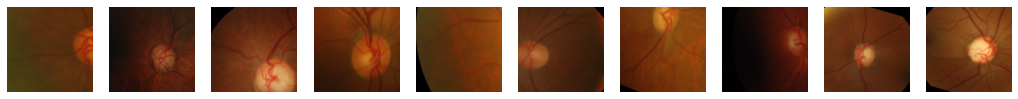

In [23]:
data_iter = iter(testloader)
images, label = next(data_iter)
fig, axes = plt.subplots(figsize = (18,4), ncols = 10)
for nm in range(10):
  ax = axes[nm]
  helper.imshow(images[nm], ax=ax, normalize = False)

In [ ]:
test_data

Dataset ImageFolder
    Number of datapoints: 153
    Root location: /content/drive/MyDrive/Drishti-GS1_files/Test
    StandardTransform
Transform: Compose(
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear), antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [24]:
pip install -U albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 KB 4.6 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1


In [25]:
from PIL import Image
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt

In [27]:
from torchvision import transforms,datasets
from torch.utils.data import Dataset, DataLoader
from albumentations.pytorch import ToTensorV2
import os
import cv2
import random
import torchvision

train_dataset_directory = "/content/drive/MyDrive/Drishti-GS1_files/Training/Images"
train_retina_filepaths = sorted([os.path.join(train_dataset_directory, f) for f in os.listdir(train_dataset_directory)])
train_correct_images_filepaths = [i for i in train_retina_filepaths if cv2.imread(i) is not None]

test_dataset_directory = "/content/drive/MyDrive/Drishti-GS1_files/Test/Images"
test_retina_filepaths = sorted([os.path.join(test_dataset_directory, f) for f in os.listdir(test_dataset_directory)])
test_correct_images_filepaths = [i for i in test_retina_filepaths if cv2.imread(i) is not None]


random.seed(42)
random.shuffle(train_correct_images_filepaths)
n = len(train_correct_images_filepaths)
n_train = int(n*0.8)
train_images_filepaths = train_correct_images_filepaths[:n_train]

random.seed(42)
random.shuffle(test_correct_images_filepaths)
n = len(test_correct_images_filepaths)
n_test = int(n*0.8)
test_images_filepaths = test_correct_images_filepaths[:n_test]
print(len(train_images_filepaths), len(test_images_filepaths))

18 40


In [28]:
class RetinalDataset(Dataset):
    def __init__(self, images_filepaths, transform=None):
        self.images_filepaths = images_filepaths
        self.transform = transform

    def __len__(self):
        return len(self.images_filepaths)

    def __getitem__(self, idx):
        image_filepath = self.images_filepaths[idx]
        image = cv2.imread(image_filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform is not None:
            image = self.transform(image=image)["image"]
        return image

In [29]:
train_transform = A.Compose(
    [
        A.Resize(height=128, width=128),
        A.Rotate(),
        A.GaussianBlur(sigma_limit=9, p=0.5),
        A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
        ToTensorV2(),
    ]
)

test_transform = A.Compose(
    [
        A.Resize(height=128, width=128),
        A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
        ToTensorV2(),
    ]
)

In [30]:
train_dataset = RetinalDataset(images_filepaths=train_images_filepaths, transform=train_transform)
test_dataset = RetinalDataset(images_filepaths=test_images_filepaths, transform=test_transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)